# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Create DataFrames for Each Type of City

In [3]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


## Deliverable 1: Get a Summary DataFrame 

##1A - Setting Up the Data Frame

In [4]:
# create the rides by type
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# total drivers by type
drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
# total fares by type
fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
# avg fares per ride
fare_per_type = fares_by_type/rides_by_type
fare_per_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# avg fares per driver
fare_per_driver = fares_by_type/drivers_by_type
fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  1. Get the total rides for each city type
urban_rides = urban_cities_df.groupby(["type"]).count()["ride_id"]
suburban_rides = suburban_cities_df.groupby(["type"]).count()["ride_id"]
rural_rides = rural_cities_df.groupby(["type"]).count()["ride_id"]


In [10]:
# 1.1 total urban rides
urban_rides

type
Urban    1625
Name: ride_id, dtype: int64

In [11]:
# 1.2 total suburban rides
suburban_rides

type
Suburban    625
Name: ride_id, dtype: int64

In [12]:
# 1.3 total suburban rides
rural_rides

type
Rural    125
Name: ride_id, dtype: int64

In [13]:
# 2. Get the total drivers for each city type
urban_drivers =urban_cities_df.groupby(["type"]).count()["driver_count"]
suburban_drivers = suburban_cities_df.groupby(["type"]).count()["driver_count"]
rural_drivers = rural_cities_df.groupby(["type"]).count()["driver_count"]


In [14]:
#2.1 total urban drivers
urban_drivers

type
Urban    1625
Name: driver_count, dtype: int64

In [15]:
#2.2 total suburban drivers
suburban_drivers

type
Suburban    625
Name: driver_count, dtype: int64

In [16]:
#2.3 total rural drivers
rural_drivers

type
Rural    125
Name: driver_count, dtype: int64

In [17]:
# 3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["type"]).sum()["fare"]
suburban_total_fare = suburban_cities_df.groupby(["type"]).sum()["fare"]
rural_total_fare = rural_cities_df.groupby(["type"]).sum()["fare"]


In [18]:
#3.2 total suburban fares
suburban_total_fare.sum()

19356.330000000013

In [19]:
#3.3 total rural fares
rural_total_fare.sum()

4327.930000000002

In [20]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.groupby(["type"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["type"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["type"]).mean()["fare"]



In [21]:
#4.1 urban average fare
urban_avg_fare

type
Urban    24.525772
Name: fare, dtype: float64

In [22]:
#4.2 suburban average fare
suburban_avg_fare

type
Suburban    30.970128
Name: fare, dtype: float64

In [23]:
#4.3 rural average fare
rural_avg_fare

type
Rural    34.62344
Name: fare, dtype: float64

In [24]:
# 5. Get the average fare per driver for each city type. 

In [25]:
#5.1 urban fare per driver
urban_avg_driver_fare=urban_total_fare.sum()/urban_drivers.sum()
urban_avg_driver_fare

24.52577230769236

In [26]:
#5.2 suburban fare per driver
suburban_avg_driver_fare=suburban_total_fare.sum()/suburban_drivers.sum()
suburban_avg_driver_fare

30.97012800000002

In [27]:
#5.3 rural fare per driver
rural_avg_driver_fare=rural_total_fare.sum()/rural_drivers.sum()
rural_avg_driver_fare

34.623440000000016

In [28]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame({"Total Rides": rides_by_type, 
                                 "Total Drivers": drivers_by_type, 
                                 "Total Fares": fares_by_type, 
                                 "Average Fare per Ride": fare_per_type, 
                                 "Average Fare per Driver": fare_per_driver
                                })
PyBer_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [29]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [30]:
#  8. Format the columns.

PyBer_summary_df['Total Rides']=PyBer_summary_df['Total Rides'].map('{:,.0f}'.format)
PyBer_summary_df['Total Drivers']=PyBer_summary_df['Total Drivers'].map('{:,.0f}'.format)
PyBer_summary_df['Total Fares']=PyBer_summary_df['Total Fares'].map('${:,.2f}'.format)
PyBer_summary_df['Average Fare per Ride']=PyBer_summary_df['Average Fare per Ride'].map('${:.2f}'.format)
PyBer_summary_df['Average Fare per Driver']=PyBer_summary_df['Average Fare per Driver'].map('${:.2f}'.format)

PyBer_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [31]:
# 1. Read the merged DataFrame
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [32]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_sum=pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_fares_sum.tail()

fare
type  date                
Urban 5/8/2019 1:54  32.69
      5/8/2019 2:31  41.33
      5/8/2019 4:20  21.99
      5/8/2019 4:39  18.45
      5/8/2019 7:29  18.55

In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_sum=total_fares_sum.reset_index()
total_fares_sum.tail()

,type,date,fare
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45
2363,Urban,5/8/2019 7:29,18.55


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fares_sum_pivot=total_fares_sum.pivot(index="date", columns="type", values="fare")
total_fares_sum_pivot.tail()

type,Rural,Suburban,Urban
date,,,
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99
5/8/2019 4:39,NaN,NaN,18.45
5/8/2019 7:29,NaN,NaN,18.55


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

total_fares_sum_pivot2=total_fares_sum_pivot.loc['1/1/2019':'4/29/2019']
total_fares_sum_pivot2



type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [36]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_fares_sum_pivot2.index = pd.to_datetime(total_fares_sum_pivot2.index)
total_fares_sum_pivot2

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [37]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fares_sum_pivot2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [38]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

total_fares_sum_pivot2_resample=total_fares_sum_pivot2.resample('W').sum()



In [39]:
total_fares_sum_pivot2_resample

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


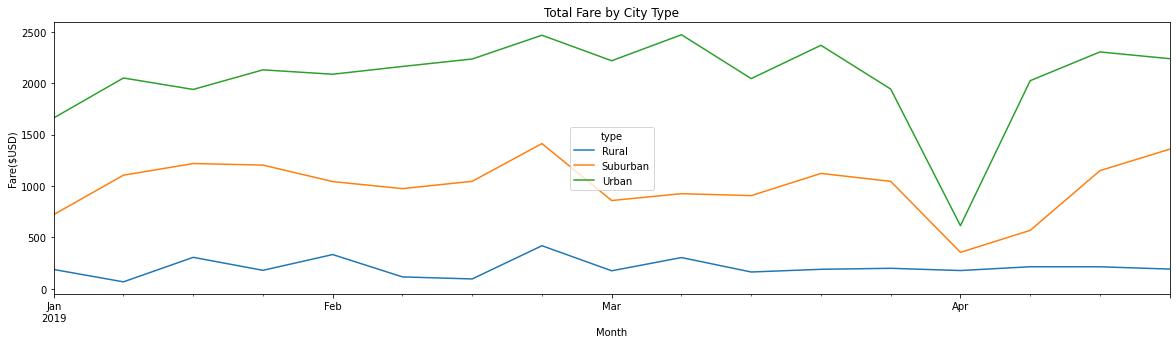

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

ax= total_fares_sum_pivot2_resample.plot(kind='line', figsize=(20,5))

# Import the style from Matplotlib.
from matplotlib import style
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('Month')

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save graph
plt.savefig("Resources/Pyber_fare_summary.png")
plt.show()


